In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
bst=pd.DataFrame(boston.feature_names)

In [4]:
bs=pd.DataFrame(boston.data)

In [5]:
bs=bs.rename({0:'CRIM',
1:'ZN',
2:'INDUS',
3:'CHAS',
4:'NOX',
5:'RM',
6:'AGE',
7:'DIS',
8:'RAD',
9:'TAX',
10:'PTRATIO',
11:'B',
12:'LSTAT'},axis=1)

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
bs['Price']=boston.target

In [8]:
dataset=bs

In [9]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
for feature in dataset.columns:
    print(f'{feature}',len(dataset[feature].unique()))

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
Price 229


In [12]:
numerical_features=[feature for feature in dataset.columns if feature not in ['CHAS'] ]

In [13]:
from scipy.stats import boxcox as bx
import scipy.stats as stat
import pylab 

In [14]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(8,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

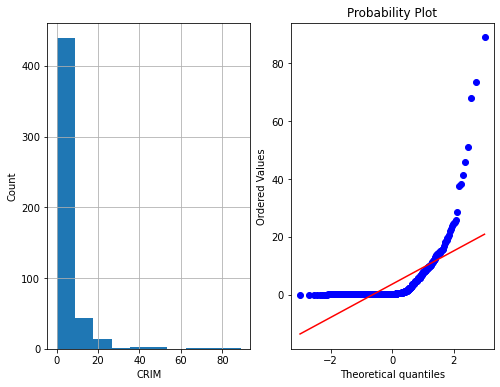

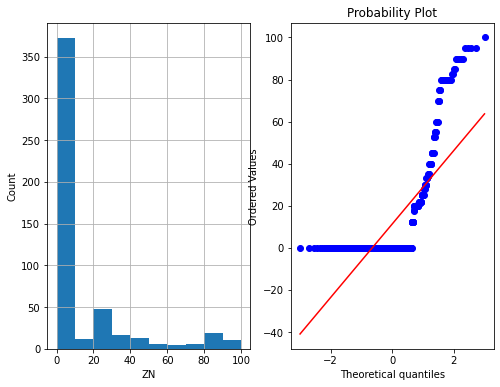

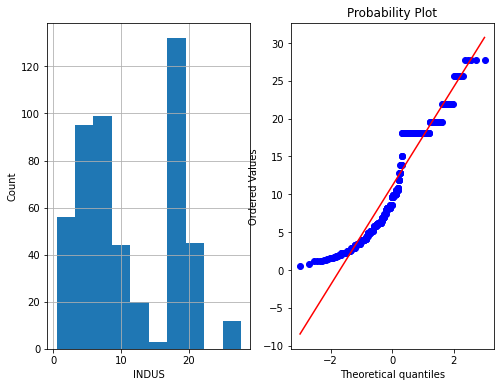

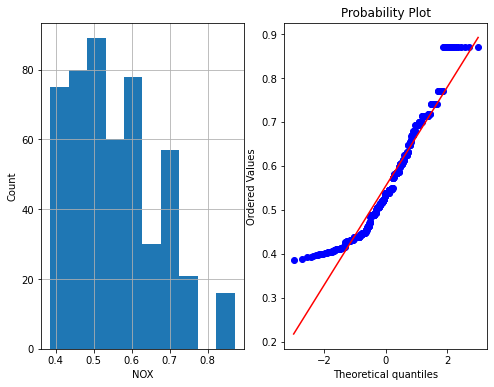

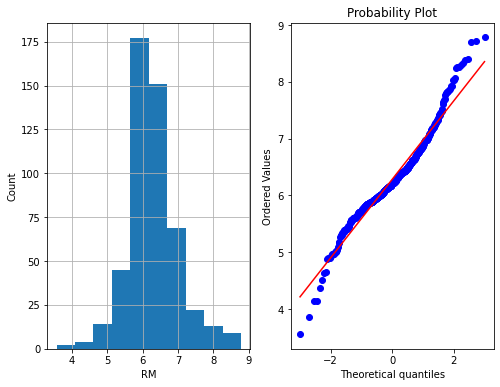

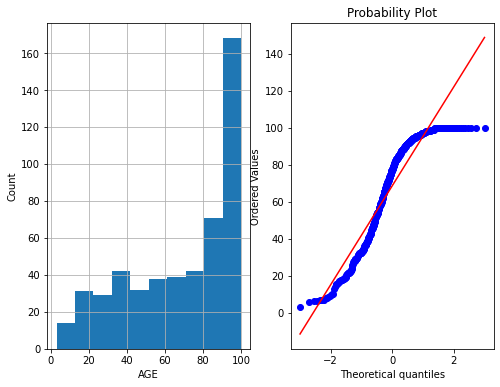

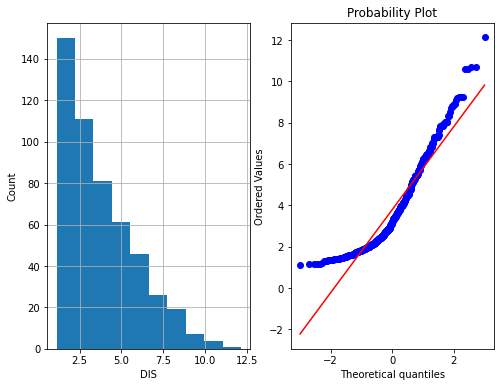

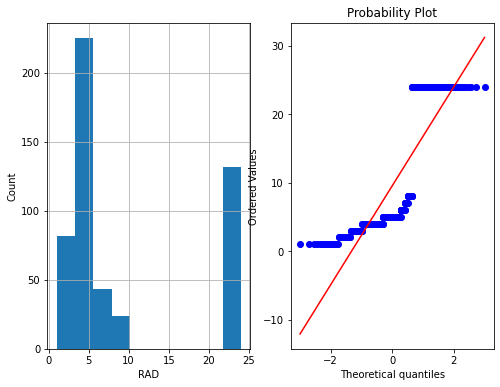

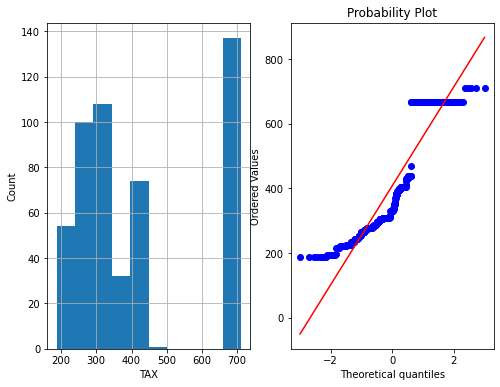

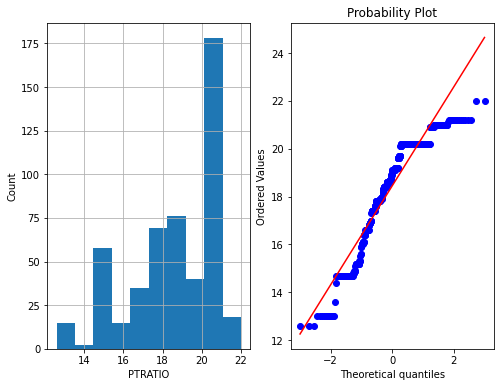

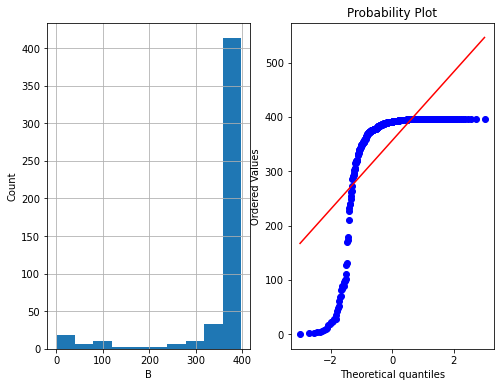

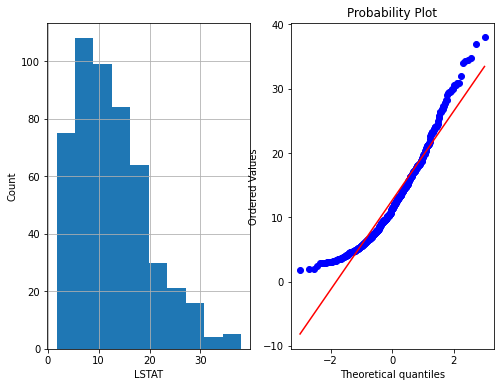

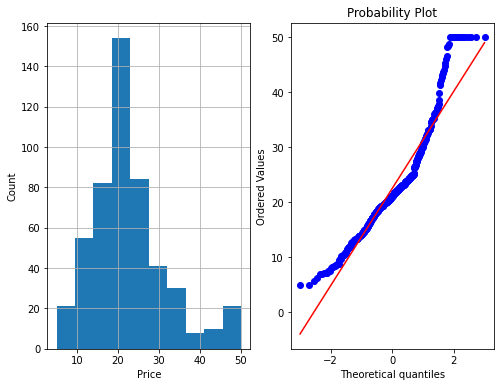

In [15]:
for feature in numerical_features:
    data=dataset.copy()
    plot_data(data,feature)

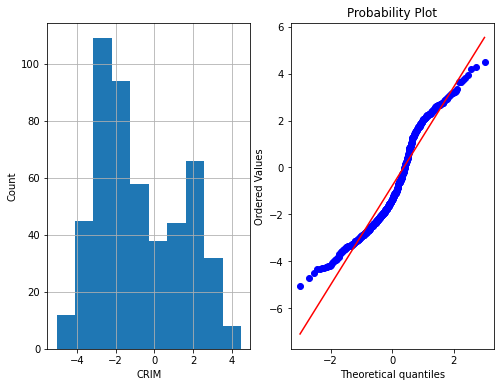

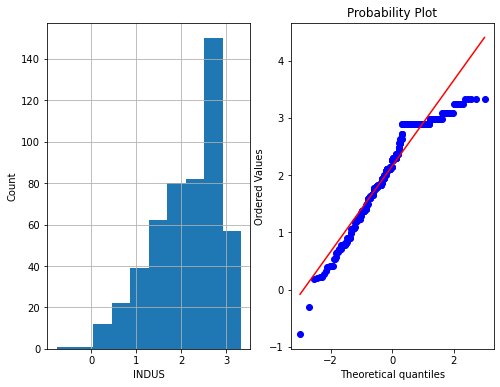

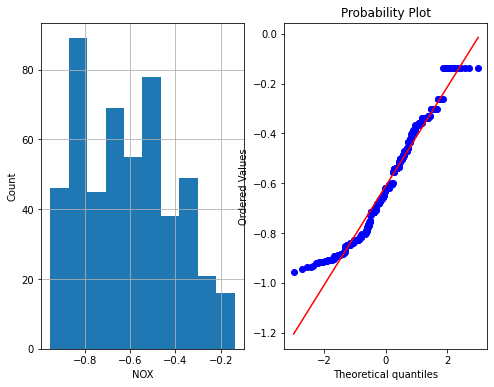

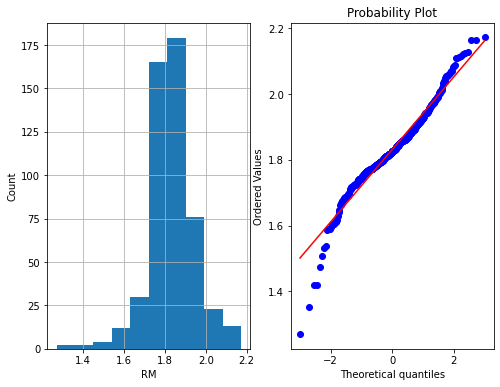

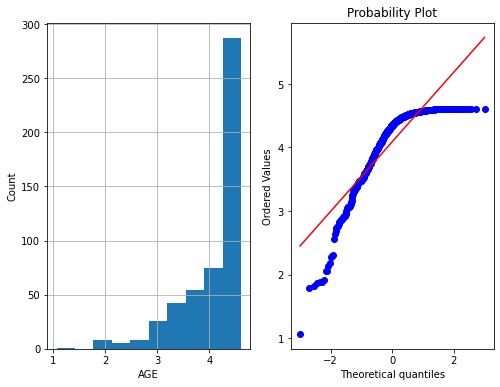

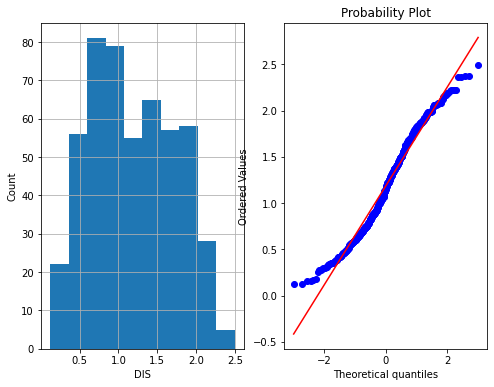

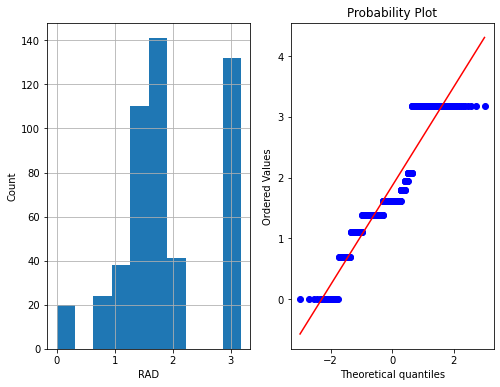

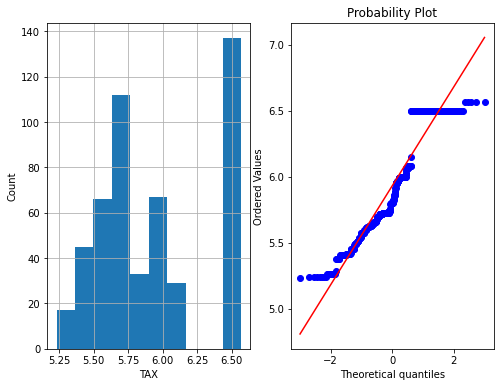

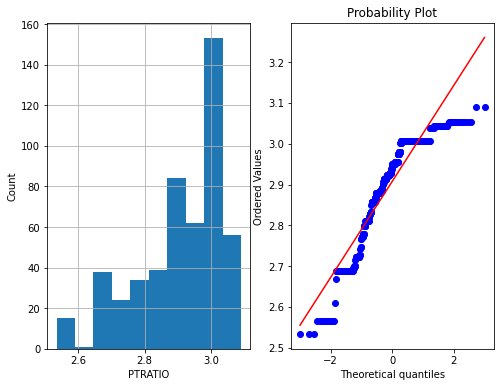

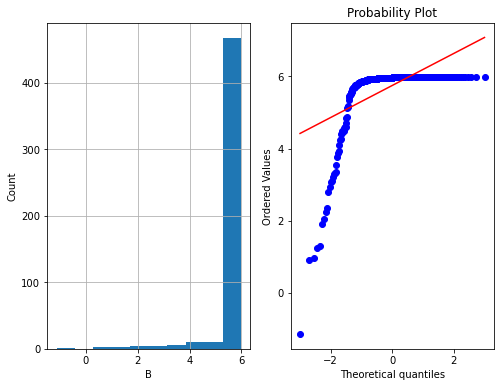

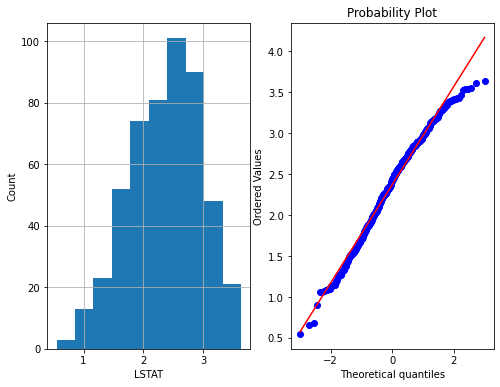

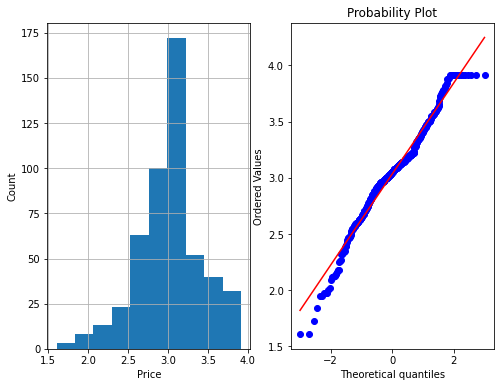

In [16]:

for feature in numerical_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plot_data(data,feature)

        

In [17]:
log_features=[feature for feature in numerical_features if feature not in ['AGE','ZN','B']]

In [18]:
log_features

['CRIM',
 'INDUS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'Price']

In [19]:
for feature in log_features:
    dataset[feature]=np.log(dataset[feature])

In [20]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,18.0,0.837248,0.0,-0.619897,1.883275,65.2,1.408545,0.000000,5.690359,2.727853,396.90,1.605430,3.178054
1,-3.600502,0.0,1.955860,0.0,-0.757153,1.859574,78.9,1.602836,0.693147,5.488938,2.879198,396.90,2.212660,3.072693
2,-3.601235,0.0,1.955860,0.0,-0.757153,1.971996,61.1,1.602836,0.693147,5.488938,2.879198,392.83,1.393766,3.546740
3,-3.430523,0.0,0.779325,0.0,-0.780886,1.945624,45.8,1.802073,1.098612,5.402677,2.928524,394.63,1.078410,3.508556
4,-2.672924,0.0,0.779325,0.0,-0.780886,1.966693,54.2,1.802073,1.098612,5.402677,2.928524,396.90,1.673351,3.589059


In [21]:
X=dataset.drop(['Price'],axis=1)
Y=dataset['Price']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[-1.98322812,  0.28482986, -1.70434352, ..., -1.44397696,
         0.44105193, -1.27526026],
       [-1.30563886, -0.48772236, -0.26323902, ..., -0.23027814,
         0.44105193, -0.26371064],
       [-1.30597804, -0.48772236, -0.26323902, ..., -0.23027814,
         0.39642699, -1.62785808],
       ...,
       [-0.93540227, -0.48772236,  0.41079194, ...,  1.09551847,
         0.44105193, -1.06793936],
       [-0.662329  , -0.48772236,  0.41079194, ...,  1.09551847,
         0.4032249 , -0.83665988],
       [-1.05026732, -0.48772236,  0.41079194, ...,  1.09551847,
         0.44105193, -0.51080901]])

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [25]:
vif

,VIF,Features
0,7.680771,CRIM
1,2.355970,ZN
2,3.833292,INDUS
3,1.080739,CHAS
4,6.022747,NOX
5,1.966493,RM
6,3.447888,AGE
7,4.930489,DIS
8,4.831245,RAD
9,4.584164,TAX


In [26]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=355)

In [28]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [29]:
# saving the model to the local file system
filename = 'finalized_LR_model.pickle'
import pickle
pickle.dump(regression, open(filename, 'wb'))

In [30]:
loaded_model = pickle.load(open(filename, 'rb'))

In [31]:
regression.score(x_train,y_train)

0.76160815574511

In [32]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [33]:
adj_r2(x_train,y_train)

0.7531174873195934

In [34]:
regression.score(x_test,y_test)

0.7777640790122669

In [35]:
adj_r2(x_test,y_test)

0.7521971146508463

In [36]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)
alpha = lasscv.alpha_
alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=4.478855710440609e-05)

In [37]:
lasso_reg.score(x_test, y_test)

0.7777179221695207